In [1]:
from matplotlib import pyplot as plt
from math import factorial
import numpy as np
from scipy.special import factorial
%config InlineBackend.figure_format = 'retina'

# Runtime Analysis

## Motivation

Ever noticed that sometimes code is slow, and sometimes it's fast?

For example, here's a function where 
* **input**: a document and a list of special words
* **output**: the number of times the special words were used in the document

In [47]:
def count_special_words( doc: list, special_words: list ) -> int:
    special_words = set(special_words)

    n_special_words = 0

    for word in doc:
        if word in special_words:
            n_special_words += 1
            
    return n_special_words

Let's test it out on the text of Pride and Prejudice, and 1000 arbitrary words:

In [48]:
import nltk

# Get Pride and Prejudice
pp = nltk.tokenize.word_tokenize( open("data/pp.txt").read().lower() )

In [49]:
pp[2000:2010]

['left',
 'the',
 'room',
 ',',
 'fatigued',
 'with',
 'the',
 'raptures',
 'of',
 'his']

In [50]:
# Get 1000 arbitrary words
words = list(set(pp))
special_words = words[0:1000]

In [51]:
special_words[0:10]

['premises',
 'withheld',
 'incapable',
 'patroness',
 'constitution',
 'utter',
 'teasing',
 'fulfil',
 '!',
 'altar']

How long does it take?

In [52]:
%time count_special_words( pp, special_words )

CPU times: user 8.93 ms, sys: 97 µs, total: 9.02 ms
Wall time: 8.98 ms


21371

Can we improve this? With one line of code?

In [53]:
# put improved implementation here. 

#%time count_special_words( pp, special_words )

## Writing fast code

Running software consumes two things: **memory space** and **time**. Of the two, **time** is most valuable, and optimizing speed gets the most attention.

There are two ways to speed up code:

### 1: Speed up every operation

There are two ways to do this:
* faster computers
* faster programming languages. 

This comes with two problems:
* As software engineers, we can't control this.
* At best, we can get a 10x speedup.
* Very expensive

### 2: Reduce the number of operations

In contrast to the above, this
* Is something we can control.
* Can result in speedups literally by a factor of billions.
* Often only takes a few moments to implement.


Our main tool in this domain is **runtime analysis**. The goal of runtime analysis is to determine the **time complexity**, which we express with **big-O notation**.

A function's time complexity will give us a very rough estimate of execution time and whether or not the function implementation is **tractable**.


## Fundamental task of runtime analysis: counting operations

An **operation** is like a line of code that does one thing. Every operation takes roughly the same amount of time - optimizing operations means optimizing time.

How any operations does the following code use? How much time does it take?

```python
for number in range(n):
    print( number )
```

(this is where the class answers)

How many operations does this take? How much time?

```python
for num0 in range(n):
    for num1 in range(n):
        print( num0, num1 )
```

(maybe do it on the board)

Yet more:

```python
word in list_of_words
```

or

```python
word0 == word
```

how about this?

```python
for i in range(n):
    for j in range(n):
        pass
```

How about a big one:

In [54]:
from itertools import permutations

# returns a list of anagram pairs
def find_anagrams(lst):
    result = []
    for word1 in lst:
        for word2 in lst:
            if word1 != word2:
                for perm in permutations(word1):
                    if perm == tuple(word2):
                        result.append((word1,word2))
    return result

In [55]:
find_anagrams( ["listen","silent","foobar"] )

[('listen', 'silent'), ('silent', 'listen')]

(work out number of ops on whiteboard)

It works out to:

$$ 1 + n^2k + n^2k!k + n^2k!$$

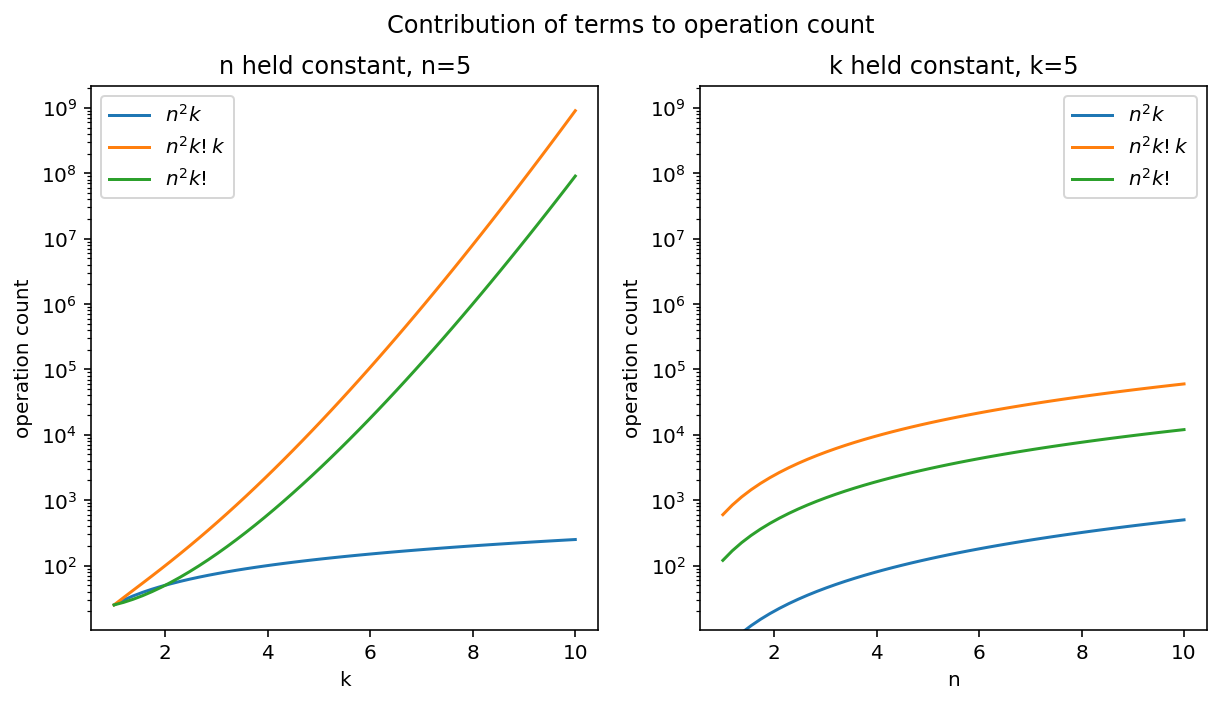

In [56]:
term1 = lambda n,k: n**2*k
term2 = lambda n,k: n**2*factorial(k)*k
term3 = lambda n,k: n**2*factorial(k)

fig, (ax0,ax1) = plt.subplots( nrows=1, ncols=2, figsize=(10,5) )

n = 5
k = np.linspace(1,10)

ax0.plot( k, term1(n,k), label="$n^2k$" )
ax0.plot( k, term2(n,k), label="$n^2k!k$" )
ax0.plot( k, term3(n,k), label="$n^2k!$" )

ax0.semilogy()

ax0.legend()
ax0.set_title("n held constant, n=%d"%n)
ax0.set_xlabel("k")
ax0.set_ylabel("operation count")

n = np.linspace(1,10)
k = 5

ax1.plot( n, term1(n,k), label="$n^2k$" )
ax1.plot( n, term2(n,k), label="$n^2k!k$" )
ax1.plot( n, term3(n,k), label="$n^2k!$" )

ax1.semilogy()

ax1.legend()
ax1.set_title("k held constant, k=%d"%k)
ax1.set_xlabel("n")
ax1.set_ylabel("operation count")
ax1.set_ylim( *ax0.get_ylim() )

plt.suptitle("Contribution of terms to operation count")

plt.show()

For large inputs generally the largest term completely dominates. That is, for large inputs the running time is almost completely determined by the largest term.

## Simplifying Runtime Analysis: "Big O"

* Runtime expression can get very complicated
* A single term often dominates the runtime expression
* "Big O" notation provides a principled way to simplify runtime expressions

Technical definition:
    
> Let $f$ and $g$ be two functions $f, g: \mathbb{N} \rightarrow \mathbb{R}^+$. We say that:
> $$ f(n) \in \mathscr{O}(g(n))$$
> (read: $f$ is Big-O of $g$) if there exists a constant $c \in \mathbb{R}^+$ and $n_0 \in \mathbb{N}$ such that for every integer $n \ge n_0$,
> $$ f(n) \le cg(n) $$

$ f(n) \in \mathscr{O}(g(n))$ is often written `f = O(g(n))`, or even just `O(g(n))`.

Big-O is way of notating when $f$ is _bounded by_ a multiple of $g$, above a some arbitary argument.

> For example, imagine I buy a \\$5000 oven and get to work making and selling croissants at a marginal profit of \\$0.75 per croissant. The expression for the profit is $0.75n - 5000$. In this case, my profit is O(n). 
> * \\$5000 disappears, because we care about large n.
> * \\$0.75 disappears, because we only care to be _proportional_ to the profit.


## Big-O in practice

What is the Big-O analysis of the anagram running time?

$$ 1 + n^2k + n^2k!k + n^2k!$$

(whiteboard time)

In most cases big-O analaysis can be performed by inspection given a piece of code by multiplying the dominanent term in a chain of nested scopes.

## Return to the anagram example

```python
def find_anagrams(lst):
    result = []                       
    d = defaultdict(list)             
    for word in lst:                  
        sortedword = sorted(word)     
        key = tuple(sortedword)       
        d[key].append( word )         
    for key, value in d.items():      
        if len(value) > 1:            
            result.extend( value )    
    return result                     
```

What is the big-O time complexity of this implementation?

## Common runtimes to remember

| complexity  |  name |  example |  n=10? | n=100?  | n=1000? | n=1e6? | n=1e100?
|---|---|---|---|---|---|---|---|
|  O(1) | constant  | hash table access (set, dict)  | ✅  |  ✅ | ✅ | ✅ | 😎
| O(log n)  |  logarithmic | searching a sorted list  | ✅  | ✅  | ✅ | ✅ | ✅
|  O(n) | linear  | searching an unsorted list  | ✅  |  ✅ | ✅ | barely | ❌
|  O(n log n) | quasilinear  | sorting a list; shortest path search  | ✅  |  ✅ | ✅ | barely | ❌
|  O(n^2) | quadratic  | search a matrix  | ✅  |  ✅ | barely | ❌ | ❌
|  O(n^3) | cubic  | triple-nested loop  | ✅  |  barely | ❌ | ❌ | ❌
|  O(n^p + n^(p-1)...) | polynomial  | loop nested p deep  | ✅  |  ❌ | ❌ | ❌ | ❌
|  O(2^n) | exponential  |  optimizing using dynamic programming  | ✅  |  ❌ | ❌ | ❌ | ❌
|  O(n!) | factorial  |  combinatorial problems; brute-force TSP  | barely  |  ❌ | ❌ | ❌ | ❌

### List operations

| operation | complexity | notes
|-----------|------------|--------
| appending | O(1)
| pop from the end | O(1)
| adding to middle | O(n) | Have to slide everything over
| pop from the middle | O(n) | "
| lookup by index | O(1) 
| searching | O(n)
| search sorted list | O(log(n)) | binary search algorithm

### Dictionary operations

| operation | complexity | notes
|-----------|------------|--------
| insert | O(1)
| remove | O(1)
| lookup by key | O(1) |
| lookup by value | O(n) | have to check every item

## Optimizing code for time

It's easy to write slow code. Fortunately, it only takes a little extra effort to write really fast code. Here are some rules of thumb.

### Avoid hidden internal loops
For $n$ larger than a few tens of thousands, complexities above quasilinear (ie, O(n*log(n))) time become intractable. However, it's _very_ easy to write O(n^2) code, either by explicitly writing a double-nested loop or, more common, executing a loop that calls an O(n) function.

For example, let's write a function where
 * input: a document
 * output: for every word in the original document, the number of times that word appears up to but not including that word.

In [57]:
def term_count(doc, word, upto_index):
    return len( [x for x in doc[0:upto_index] if x==word] )

In [58]:
def cumulative_term_count(doc):
    ret = []
    for i, word in enumerate( doc ):
        ret.append( term_count(doc, word, i) )
    return ret

In [61]:
# go ahead. try your luck.
cumulative_term_count( pp )

KeyboardInterrupt: 

The time complexity of `term_count` is O(n), which is called by `cumulative_term_count` n times, for a total time complexity of O(n^2). Pride and Prejudice is 146820 words long. 

That n^2 is 21,556,112,400. We've found ourselves in intractable territory.

Whenever you find yourself with a O(n^2) or worse algorithm, the primary strategy is generally to change the internal loop from O(n) to O(1) or O(log n) by using either a hash table or sorted list to do most of the work. Let's try:

In [62]:
from collections import Counter

def cumulative_term_count(doc):
    counts = Counter()                    # 1
    ret = []                              # 1
    for i, word in enumerate( doc ):      # n times
        word_count = counts.get(word, 0)  # constant time lookups from dict
        ret.append( word_count )          # constant time appends to list
        counts.update( word )             # constant time set value to dict
    return ret

The total operation count in this case is $2 + 3n$; the time complexity is O(n). We did it!

In [63]:
foo = cumulative_term_count(pp)

## Appendix: the Sieve of Eratosthenes

Here's a function that checks whether or not a number is a prime, and then another function that finds every prime less than $n$.



In [57]:
def is_prime(n):
    for i in range(2, int(n**0.5)+1):   # n**5 times
        if n%i==0:                      # 1
            return False                # 1
    return True                         #

def get_primes(n):
    ret = []                 # 1
    for i in range(1,n):     # n times
        if is_prime( i ):    # i**0.5
            ret.append( i )  # 1
    return ret               #

The runtime is $1+\sum^n_{i=0}{\sqrt{i}}$. The average value of $i$ is $n/2$, simplifying this expression to $1+n{\sqrt{n/2}} = 1 + n^{1.5}/\sqrt(2)$.

The runtime complexity is thus `O(n^1.5)`. To glance at `get_primes` it might seem to run in linear time, but in fact it's running in superlinear polynomial time. Not great!

In [56]:
%time _ = get_primes(1000000)

CPU times: user 5.47 s, sys: 25 ms, total: 5.5 s
Wall time: 5.53 s


In [111]:
def get_primes(n):
    ret = []                               # O(1)
    
    primes = [True]*n                      # O(n)
    primes[0] = False # 0 is not a prime   # O(1)
    
    for i in range(2, int(n**0.5)+1):      # n^0.5 times
        for j in range(i*2, n, i):         # n/i times
            primes[j] = False              # O(1)

    for i, is_prime in enumerate( primes ):# n times
        if is_prime:                       # O(1)
            ret.append( i )                # O(1)
    
    return ret

Of central interest is the middle loop, with a number of operations proportional to:

$$\sqrt{n}\frac{n}{\sqrt{n}/2} = 2n$$

Thus the running time is `O(n)`! Linear!

In [115]:
%time _ = get_primes(1000000)

CPU times: user 724 ms, sys: 10.9 ms, total: 735 ms
Wall time: 740 ms
